# XG325: Explainable Artificial Intelligence
    
## Exercise 3

**Week 07 | Lecture 03**

_Saturday, April 13, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import tensorflow
import sklearn.linear_model
import sklearn.metrics
import sklearn.inspection

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Example: Feature Importance

In [2]:
# Load dataset
x1 = numpy.random.random(size=2001)
x2 = 0.1*numpy.random.random(size=2001)
x3 = numpy.random.random(size=2001)
xx = pandas.DataFrame.from_dict({'x1': x1, 'x2': x2, 'x3': x3})

y = x1**3 + x2
y += numpy.random.normal(0, 0.1, size=(2001,))

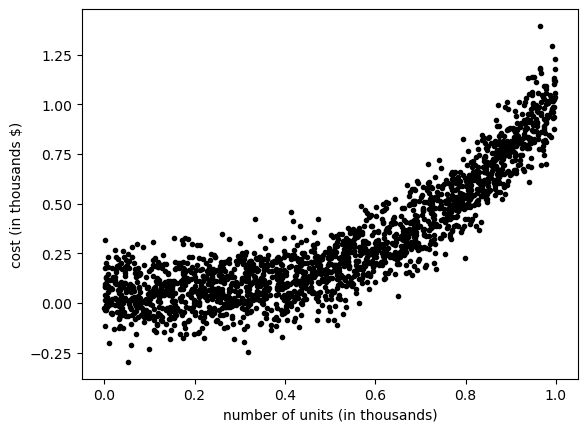

In [3]:
# Plot
plt.plot(x1, y, 'k.')
plt.xlabel('number of units (in thousands)')
plt.ylabel('cost (in thousands $)')
plt.show()

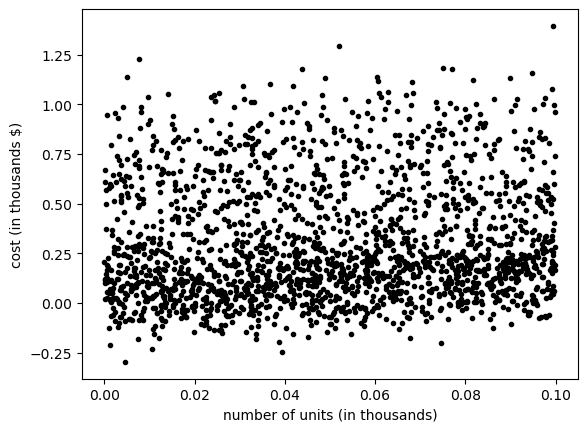

In [4]:
# Plot
plt.plot(x2, y, 'k.')
plt.xlabel('number of units (in thousands)')
plt.ylabel('cost (in thousands $)')
plt.show()

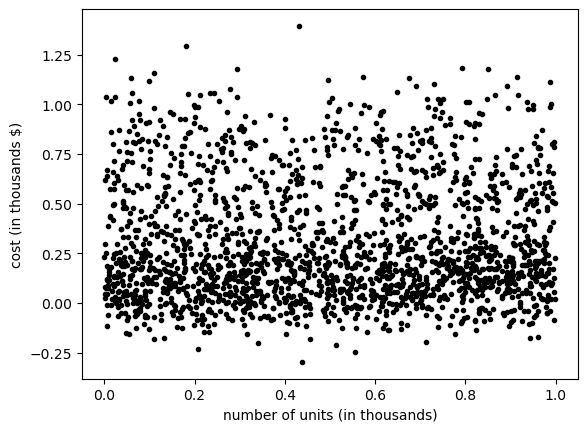

In [5]:
# Plot
plt.plot(x3, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

In [6]:
train_x, val_x, train_y, val_y = sklearn.model_selection.train_test_split(xx, y, test_size=0.3)

In [7]:
# Fit
reg = sklearn.linear_model.LinearRegression()
reg.fit(train_x, train_y)

reg.intercept_, reg.coef_

(-0.2159633471977508, array([0.89523657, 1.19013438, 0.01246279]))

In [8]:
sklearn.metrics.mean_squared_error(reg.predict(val_x), val_y)

0.021518111069552093

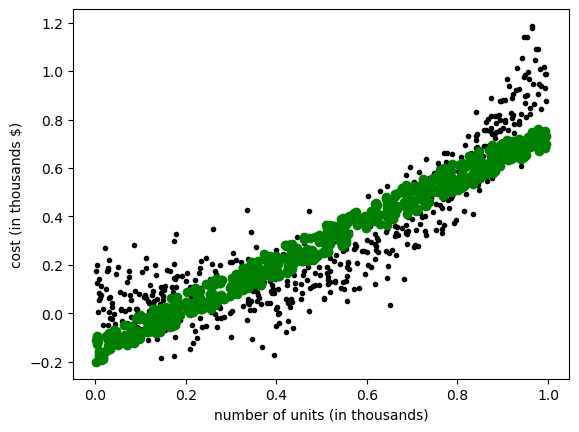

In [9]:
# Plot results
plt.plot(val_x.x1, val_y, 'k.')
plt.plot(val_x.x1, reg.predict(val_x), 'go')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

In [10]:
per = sklearn.inspection.permutation_importance(
    reg, val_x, val_y, n_repeats=30, random_state=0, scoring='neg_mean_absolute_error')

In [11]:
for i in per.importances_mean.argsort()[::-1]:
    print(f"{xx.columns[i]:<5}"
          f"{per.importances_mean[i]:.4f}"
          f" +/- {per.importances_std[i]:.4f}")

x1   0.2044 +/- 0.0075
x2   0.0029 +/- 0.0014
x3   0.0000 +/- 0.0001


## Exercisse

Repeat the same, but this time using neural networks.

In [12]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(3,)),
    tensorflow.keras.layers.Dense(256, activation='relu'),
    tensorflow.keras.layers.Dense(512, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.MeanSquaredError(),
    metrics=['mse', 'mae']
)

model.summary()

/opt/miniconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-13 14:47:26.130013: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-04-13 14:47:26.130049: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-13 14:47:26.130056: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-13 14:47:26.130073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-13 14:47:26.130083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
"""Train"""
log = model.fit(train_x, train_y, epochs=8, validation_data=(val_x,  val_y))

Epoch 1/8


2025-04-13 14:47:27.130777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0581 - mae: 0.1866 - mse: 0.0581 - val_loss: 0.0266 - val_mae: 0.1263 - val_mse: 0.0266
Epoch 2/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0252 - mae: 0.1275 - mse: 0.0252 - val_loss: 0.0224 - val_mae: 0.1227 - val_mse: 0.0224
Epoch 3/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0254 - mae: 0.1265 - mse: 0.0254 - val_loss: 0.0241 - val_mae: 0.1196 - val_mse: 0.0241
Epoch 4/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0265 - mae: 0.1308 - mse: 0.0265 - val_loss: 0.0263 - val_mae: 0.1327 - val_mse: 0.0263
Epoch 5/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0292 - mae: 0.1360 - mse: 0.0292 - val_loss: 0.0255 - val_mae: 0.1245 - val_mse: 0.0255
Epoch 6/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0295 - mae: 0.1358 - mse: 0.0295 - val_loss: 0.0391 - val_mae: 0.1499 - val_mse: 0.0391
Epoch 7/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0361 - mae: 0.1500 - mse: 0.0361 - val_loss: 0.0247 - val_mae:

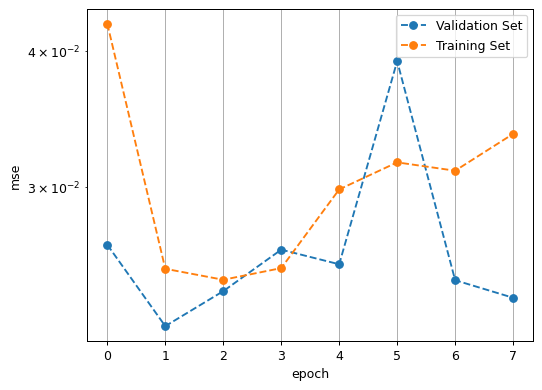

In [14]:
plt.figure(dpi=90)
plt.plot(log.history['val_mse'], 'o--', label='Validation Set')
plt.plot(numpy.array(log.history['mse']), 'o--', label='Training Set')

plt.ylabel('mse')
plt.xlabel('epoch')
plt.yscale("log")
plt.grid()

plt.legend()
plt.show()

In [15]:
"""Evaluate"""
model.evaluate(val_x,  val_y, verbose=2)

19/19 - 0s - 5ms/step - loss: 0.0238 - mae: 0.1274 - mse: 0.0238


[0.02377181686460972, 0.02377181686460972, 0.12736138701438904]

In [16]:
sklearn.metrics.mean_squared_error(model.predict(val_x), val_y)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.02377181864833595

In [17]:
model.get_weights()

[array([[ 0.30061626, -0.05335566,  0.27414876, ...,  0.33640397,
          0.26197588, -0.07096732],
        [ 0.09580114,  0.03332002, -0.0679687 , ...,  0.00454486,
         -0.01159442, -0.03286816],
        [-0.02919002, -0.08568551, -0.01422211, ...,  0.00349477,
          0.0203088 ,  0.09948825]], dtype=float32),
 array([-0.00811572, -0.00571851, -0.00347514, ..., -0.02090121,
        -0.02476094,  0.06287721], dtype=float32),
 array([[ 0.06728102,  0.01628651, -0.02344494, ..., -0.07880997,
         -0.0821744 ,  0.06007076],
        [ 0.07918924,  0.0295246 ,  0.0825026 , ...,  0.03080673,
         -0.01827239,  0.03456497],
        [-0.00950253, -0.06836595, -0.01808134, ..., -0.08097932,
         -0.01377901,  0.0572387 ],
        ...,
        [-0.0086651 ,  0.05333858, -0.08585928, ..., -0.07126795,
          0.03540499,  0.07292813],
        [-0.0581769 , -0.01105701,  0.03059811, ..., -0.0749753 ,
         -0.02154828, -0.02101186],
        [ 0.0313353 , -0.02311767,  0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


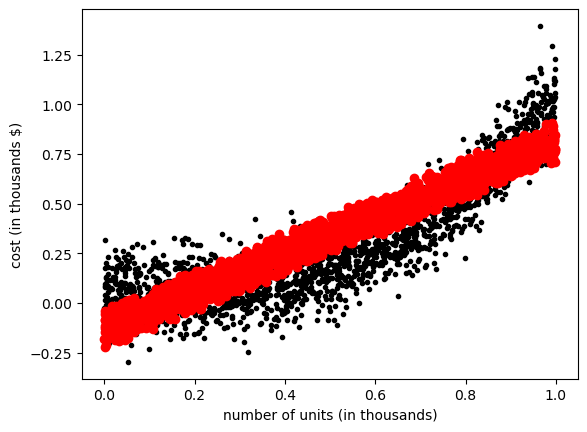

In [18]:
# Plot
plt.plot(x1, y, 'k.')
plt.plot(x1, model.predict(xx), 'ro')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

In [21]:
per = sklearn.inspection.permutation_importance(
    model, val_x, val_y, n_repeats=30, random_state=0, scoring='neg_mean_absolute_error')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
19/19 ━━━━━━━

In [22]:
for i in per.importances_mean.argsort()[::-1]:
    print(f"{xx.columns[i]:<5}"
          f"{per.importances_mean[i]:.4f}"
          f" +/- {per.importances_std[i]:.4f}")

x1   0.2042 +/- 0.0080
x2   0.0020 +/- 0.0012
x3   -0.0007 +/- 0.0013
